This is a coding challenge.

Albert and the ear shells
=========================

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0b/AbaloneInside.jpg">

Ear shells are marine snails

The age of ear shells can be determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope - a boring and time-consuming task.

**Albert**, a scientist and **ear shells** specialist, needs your help. He has collected data on his favorite sea creature and asks you to help him understand it. Then, he would like you to develop a model to predict the number of rings of ear shells (a proxy to their age) using other measurements which are easier to obtain.

# Part 0: Setup

Please include any setup code (including imports) in this section

In [ ]:
# import numpy, pandas, seaborn and other libraries needed for  Data Science pipeline end-to-end (from data loading to model evaluation)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Part 1: Data understanding

## Loading, processing and exploring data

Albert has provided you the dataset `earshells.csv`. Please load it and do what every diligent Data Scientist should do when received a new dataset !

In [ ]:
# load earshells.csv
df = pd.read_csv('earshells.csv')
df

,subset,sex,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings,price
0,train,I,0.349544,0.260194,0.074504,0.179963,0.089707,0.024760,0.054516,5.0,1.205721
1,train,F,0.545249,0.439866,0.134915,0.918132,0.428983,0.201751,0.237840,10.0,18.403463
2,test,F,0.649654,0.544545,0.175080,1.524459,0.590134,0.325970,0.495506,10.0,31.455767
3,train,I,0.500003,0.394566,0.140912,0.621133,0.292336,0.120165,0.195429,9.0,5.647747
4,train,I,0.439268,0.335001,0.110040,0.389429,0.175157,0.083279,0.110899,7.0,1.966989
...,...,...,...,...,...,...,...,...,...,...,...
3169,train,M,0.690490,0.550416,0.180363,1.692044,0.665989,0.402392,0.500689,11.0,25.770539
3170,train,I,0.345047,0.255339,0.095216,0.194550,0.091683,0.036335,0.055339,6.0,2.599017
3171,test,M,0.610011,0.460515,0.159627,0.999663,0.493984,0.197194,0.274957,10.0,13.443444
3172,train,M,0.749726,0.554736,0.214471,2.200778,1.061781,0.522346,0.527892,11.0,32.190442


In [ ]:
# get info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subset          3174 non-null   object 
 1   sex             3174 non-null   object 
 2   length          3174 non-null   float64
 3   diameter        3174 non-null   float64
 4   height          3174 non-null   float64
 5   weight_whole    3174 non-null   float64
 6   weight_shucked  3174 non-null   float64
 7   weight_viscera  3174 non-null   float64
 8   weight_shell    3174 non-null   float64
 9   rings           3143 non-null   float64
 10  price           3143 non-null   float64
dtypes: float64(9), object(2)
memory usage: 272.9+ KB


Let's quickly clean the data:
Checklist:

Fix Rows and Columns:
Delete irrelevant rows such as totals, subtotals, headers, footers, and blank rows.
Merge columns to create unique identifiers (e.g., State + City = Full Address).
Split columns for detailed analysis (e.g., split address into State and City).
Add missing column names and rename for consistency.
Delete unnecessary columns and realign misaligned ones.

Fix Missing Values:
Set non-standard indicators (e.g., "NA", "999") as missing.
Avoid fabricating data; use reliable external sources when possible.
Remove rows or columns with significant missing data.
Fill identifiable missing values using logical assumptions.

Standardize Values:
Ensure consistent units and scales (e.g., convert lbs to kgs).
Standardize numerical precision (e.g., round to two decimal places).
Remove outliers and standardize text cases and formats (e.g., date formats, name orders).

Fix Invalid Values:
Correct data encoding and types (e.g., convert string to number).
Remove or correct out-of-range values and non-conforming data structures.
Validate data against internal rules (e.g., delivery dates must be post-order dates).

Filter Data:
Deduplicate data and filter rows by segments or periods relevant to the analysis.
Select columns critical to the analysis and group or aggregate data as needed.

In [ ]:
# lets quickly clean the data
# first check if the df has empty rows/col
df.isnull().sum()

subset             0
sex                0
length             0
diameter           0
height             0
weight_whole       0
weight_shucked     0
weight_viscera     0
weight_shell       0
rings             31
price             31
dtype: int64

In [ ]:
# show all rows with rings empty value
df[df['rings'].isnull()]

,subset,sex,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings,price
214,train,I,0.000000,0.000000,0.053713,0.791070,0.000000,0.000000,0.000000,NaN,NaN
437,train,M,1.834685,0.000000,1.343274,1.061885,0.459406,2.271939,1.164090,NaN,NaN
530,train,M,0.936320,0.177193,0.000000,0.716010,0.010560,2.052565,0.184903,NaN,NaN
531,train,I,0.819914,1.212821,0.480761,2.773814,0.542232,0.000000,0.000000,NaN,NaN
582,train,M,0.000000,0.613015,1.043975,0.000000,0.554927,0.607738,0.000000,NaN,NaN
601,train,M,1.733158,0.523900,2.662290,1.423875,1.272914,0.079588,0.000000,NaN,NaN
705,train,M,0.792071,0.369101,0.664989,1.163247,0.000000,3.196680,1.545075,NaN,NaN
725,train,M,1.722334,0.461671,0.458374,1.061847,1.905003,0.219705,0.000000,NaN,NaN
886,train,M,0.000000,0.000000,0.353420,2.188981,0.359557,0.894607,0.400463,NaN,NaN
1042,train,M,0.000000,0.000000,1.578108,0.000000,0.000000,0.998569,0.000000,NaN,NaN


In [ ]:
# lets have a look at all the rings data so we can see if we should drop the data or replace empty ring data with median
df['rings'].value_counts()

rings
9.0     689
10.0    634
8.0     568
11.0    487
7.0     391
6.0     259
5.0     115
Name: count, dtype: int64

In [ ]:
# Calculate the median value of 'rings'
median_rings = df['rings'].median()
print("Median of 'rings':", median_rings)

# Calculate the percentage of missing values in 'rings'
missing_percentage = df['rings'].isnull().mean() * 100
print("Percentage of missing 'rings' data:", missing_percentage)


Median of 'rings': 9.0
Percentage of missing 'rings' data: 0.9766855702583491


Seems like median is a good represenatation, data is not too scattered.

In [ ]:
# Replace missing 'rings' values with the median
df['rings'].fillna(median_rings, inplace=True)

# Verify the changes by checking if there are any missing values left
print("Missing 'rings' data after imputation:", df['rings'].isnull().sum())

Missing 'rings' data after imputation: 0


In [ ]:
# # show all rows with price empty value
df[df['price'].isnull()]

,subset,sex,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings,price
214,train,I,0.000000,0.000000,0.053713,0.791070,0.000000,0.000000,0.000000,9.0,NaN
437,train,M,1.834685,0.000000,1.343274,1.061885,0.459406,2.271939,1.164090,9.0,NaN
530,train,M,0.936320,0.177193,0.000000,0.716010,0.010560,2.052565,0.184903,9.0,NaN
531,train,I,0.819914,1.212821,0.480761,2.773814,0.542232,0.000000,0.000000,9.0,NaN
582,train,M,0.000000,0.613015,1.043975,0.000000,0.554927,0.607738,0.000000,9.0,NaN
601,train,M,1.733158,0.523900,2.662290,1.423875,1.272914,0.079588,0.000000,9.0,NaN
705,train,M,0.792071,0.369101,0.664989,1.163247,0.000000,3.196680,1.545075,9.0,NaN
725,train,M,1.722334,0.461671,0.458374,1.061847,1.905003,0.219705,0.000000,9.0,NaN
886,train,M,0.000000,0.000000,0.353420,2.188981,0.359557,0.894607,0.400463,9.0,NaN
1042,train,M,0.000000,0.000000,1.578108,0.000000,0.000000,0.998569,0.000000,9.0,NaN


In [ ]:
# lets do the same for price data now
df['price'].value_counts()

price
0.100000     40
7.050851      1
3.007393      1
6.626892      1
2.254536      1
             ..
3.715429      1
23.839882     1
5.204865      1
27.072431     1
30.086884     1
Name: count, Length: 3104, dtype: int64

In [ ]:
# Calculate the median value of 'price'
median_price = df['price'].median()
print("Median of 'price':", median_price)

# Calculate the percentage of missing values in 'rings'
missing_percentage = df['price'].isnull().mean() * 100
print("Percentage of missing 'price' data:", missing_percentage)

Median of 'price': 10.000911688119793
Percentage of missing 'price' data: 0.9766855702583491


Lets replace empty values with median

In [ ]:
# Replace missing 'price' values with the median
df['price'].fillna(median_price, inplace=True)

# Verify the changes by checking if there are any missing values left
print("Missing 'price' data after imputation:", df['price'].isnull().sum())

Missing 'price' data after imputation: 0


In [ ]:
# lets check how many cols with empty values we have left
df.isnull().sum()

subset            0
sex               0
length            0
diameter          0
height            0
weight_whole      0
weight_shucked    0
weight_viscera    0
weight_shell      0
rings             0
price             0
dtype: int64

For better analysis, i would recommend to go ahead and check the remaining data as according to the checklist provided above. However, i do not have time.

## Questions

Albert needs your help getting a deeper understanding of one particular aspect of this data: the price of ear shells. Can you help him ?

In [ ]:
# get description of df
df.describe()

,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings,price
count,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000
mean,0.514369,0.400696,0.137644,0.762393,0.342232,0.171397,0.214670,8.691556,11.989660
std,0.134614,0.127081,0.085251,0.467023,0.221347,0.136742,0.134140,1.644695,8.919475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.100000
25%,0.430444,0.330102,0.105422,0.380190,0.164375,0.081057,0.111309,8.000000,4.466348
50%,0.525349,0.409146,0.135162,0.709052,0.311254,0.153026,0.200179,9.000000,10.000912
75%,0.604510,0.474409,0.159900,1.084979,0.489777,0.238163,0.296504,10.000000,18.119860
max,1.973813,3.491197,2.662290,2.987259,1.905003,3.196680,1.545075,11.000000,52.901790


Price Overview:

* The price column ranges from 0.1 to 52.901790
* Mean price: 12.009276
* Median price: 10.000912
* 25th percentile: 4.404896
* 75th percentile: 18.243623

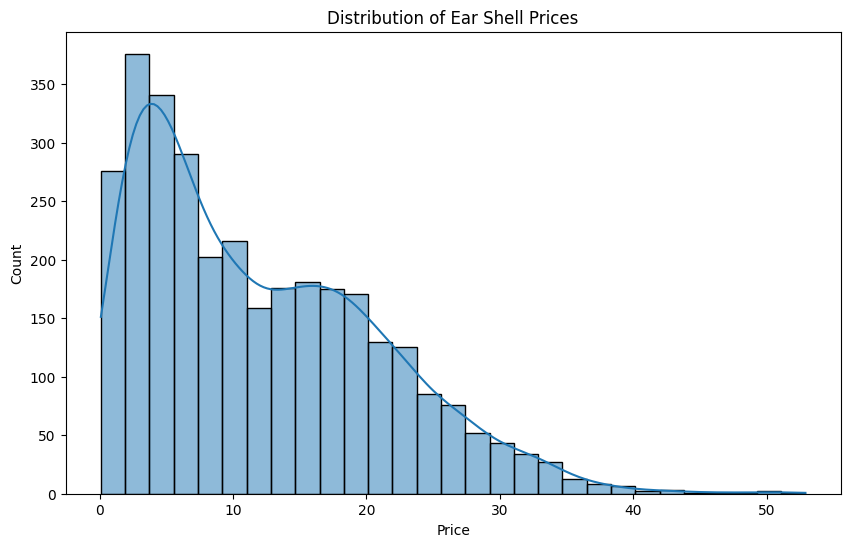

In [ ]:
# Price distribution visualisation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Ear Shell Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

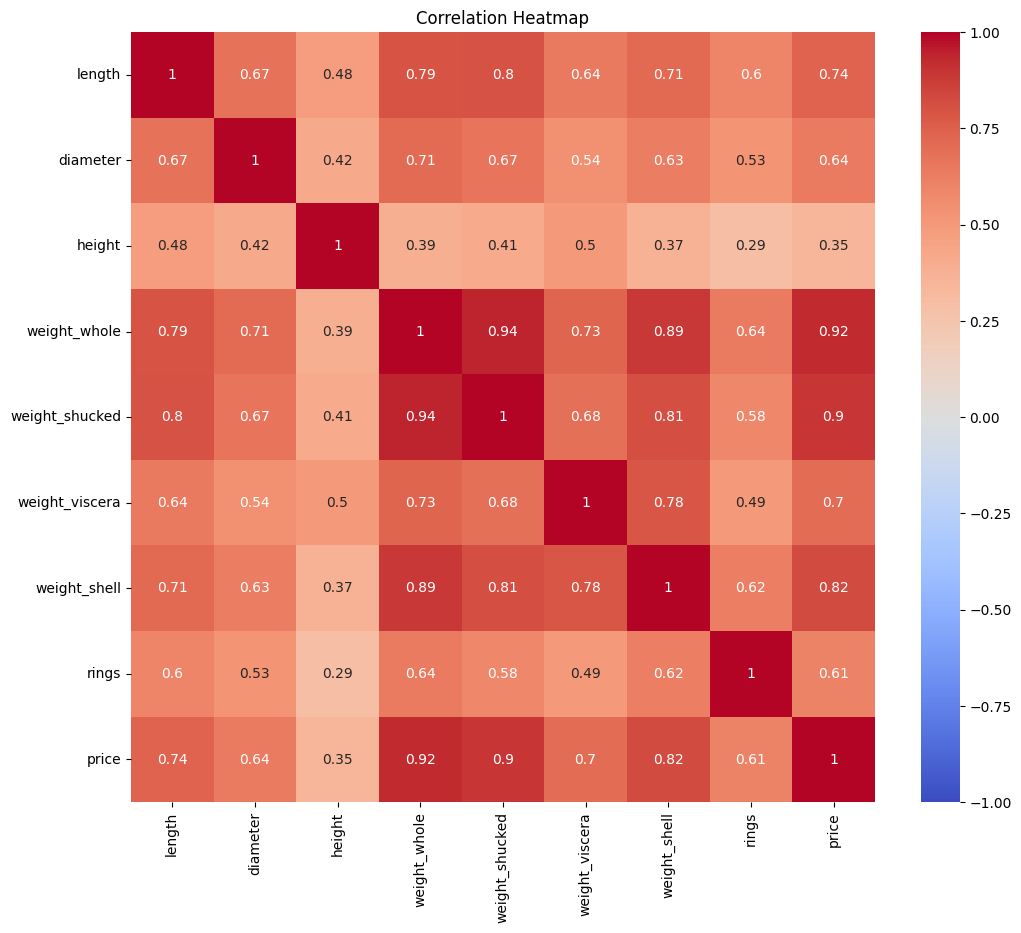

In [ ]:
# Select numerical columns
numerical_columns = ['length', 'diameter', 'height', 'weight_whole', 'weight_shucked',
                     'weight_viscera', 'weight_shell', 'rings', 'price']

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# If you want to specifically look at correlations with price
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print("Correlations with price:")
print(price_correlations)

Correlations with price:
price             1.000000
weight_whole      0.924980
weight_shucked    0.897741
weight_shell      0.822951
length            0.735086
weight_viscera    0.695320
diameter          0.638724
rings             0.607779
height            0.345638
Name: price, dtype: float64


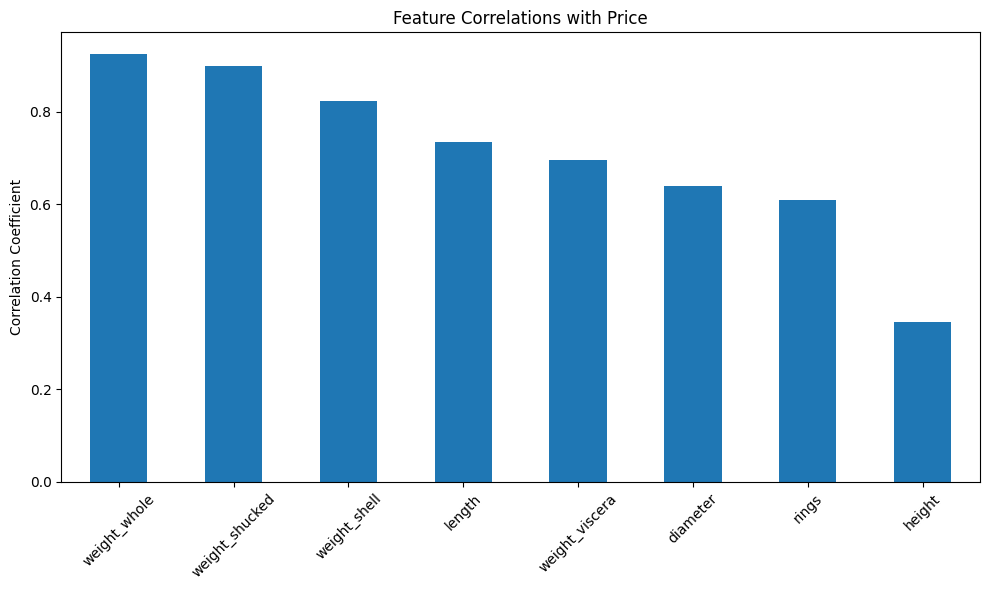

In [ ]:
# bar plot of correlations with price
plt.figure(figsize=(10, 6))
price_correlations.drop('price').plot(kind='bar')
plt.title('Feature Correlations with Price')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

What we can see:
* Strong positive correlations: All features shown have positive correlations with price, indicating that as these features increase, the price tends to increase as well.
* Weight is most influential: The whole weight of the ear shell has the strongest correlation with price, followed closely by the shucked weight. This suggests that heavier ear shells generally command higher prices.
* Shell weight importance: The weight of the shell itself is the third most correlated feature with price, indicating that shells with more substantial shells tend to be more valuable.
* Size matters: Length and diameter both show moderate to strong positive correlations with price, suggesting that larger ear shells are generally more expensive.
* Internal weights: The weights of the viscera (internal organs) also correlate positively with price, though not as strongly as the whole or shell weight.
Rings (age indicator): The number of rings, which typically indicates the age of the ear shell, has a moderate positive correlation with price. This suggests that older ear shells tend to be more valuable, but not as strongly as size or weight factors.
* Height least correlated: While still positively correlated, the height of the ear shell has the weakest correlation with price among the features shown.
* Multifaceted pricing: The fact that multiple features correlate strongly with price suggests that the pricing of ear shells is based on a combination of factors rather than a single dominant characteristic.

In [ ]:
#calculate mean and median price
mean_price = df['price'].mean()
median_price = df['price'].median()

print("Mean price:", mean_price)
print("Median price:", median_price)

Mean price: 11.989660304106874
Median price: 10.000911688119793


Other notes:

The difference between the mean price (11.99) and the median price (10.00) indicates that the price distribution is skewed.
Specifically:

* Right-skewed distribution: The mean being higher than the median suggests a right-skewed (or positively skewed) distribution of prices.
* Presence of high-value outliers: This skew likely indicates the presence of some higher-priced ear shells that are pulling the mean up above the median.
* Majority of prices: The median being lower than the mean suggests that the majority of ear shells are priced below the average price.
* Implications for pricing analysis: When dealing with skewed data like this, the median might be a more representative measure of the "typical" price than the mean.
* Potential market insights: This distribution could indicate a premium segment in the market where some ear shells command significantly higher prices than the majority.

### Question 1.1

What's the **average price** for ear shells with a **diameter** falling outside the interquartile range (of diameter) ?

In [ ]:
# average price for ear shells with a diameter falling outside the interquartile range (of diameter)
# Calculate Q1 and Q3 for the diameter
Q1 = df['diameter'].quantile(0.25)
Q3 = df['diameter'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers in the diameter column
outliers = df[(df['diameter'] < (Q1 - 1.5 * IQR)) | (df['diameter'] > (Q3 + 1.5 * IQR))]

# Calculate the average price for these outliers
average_price_outliers = outliers['price'].mean()
print(f"The average price for ear shells with diameters falling outside the IQR is: {average_price_outliers}")

The average price for ear shells with diameters falling outside the IQR is: 10.000911688119793


### Question 1.2

Albert would like to understand which factors / attributes have been used to determine the price. Please provide him with **one clear visualization** which explicits the dependency between the price and the most relevant attributes.

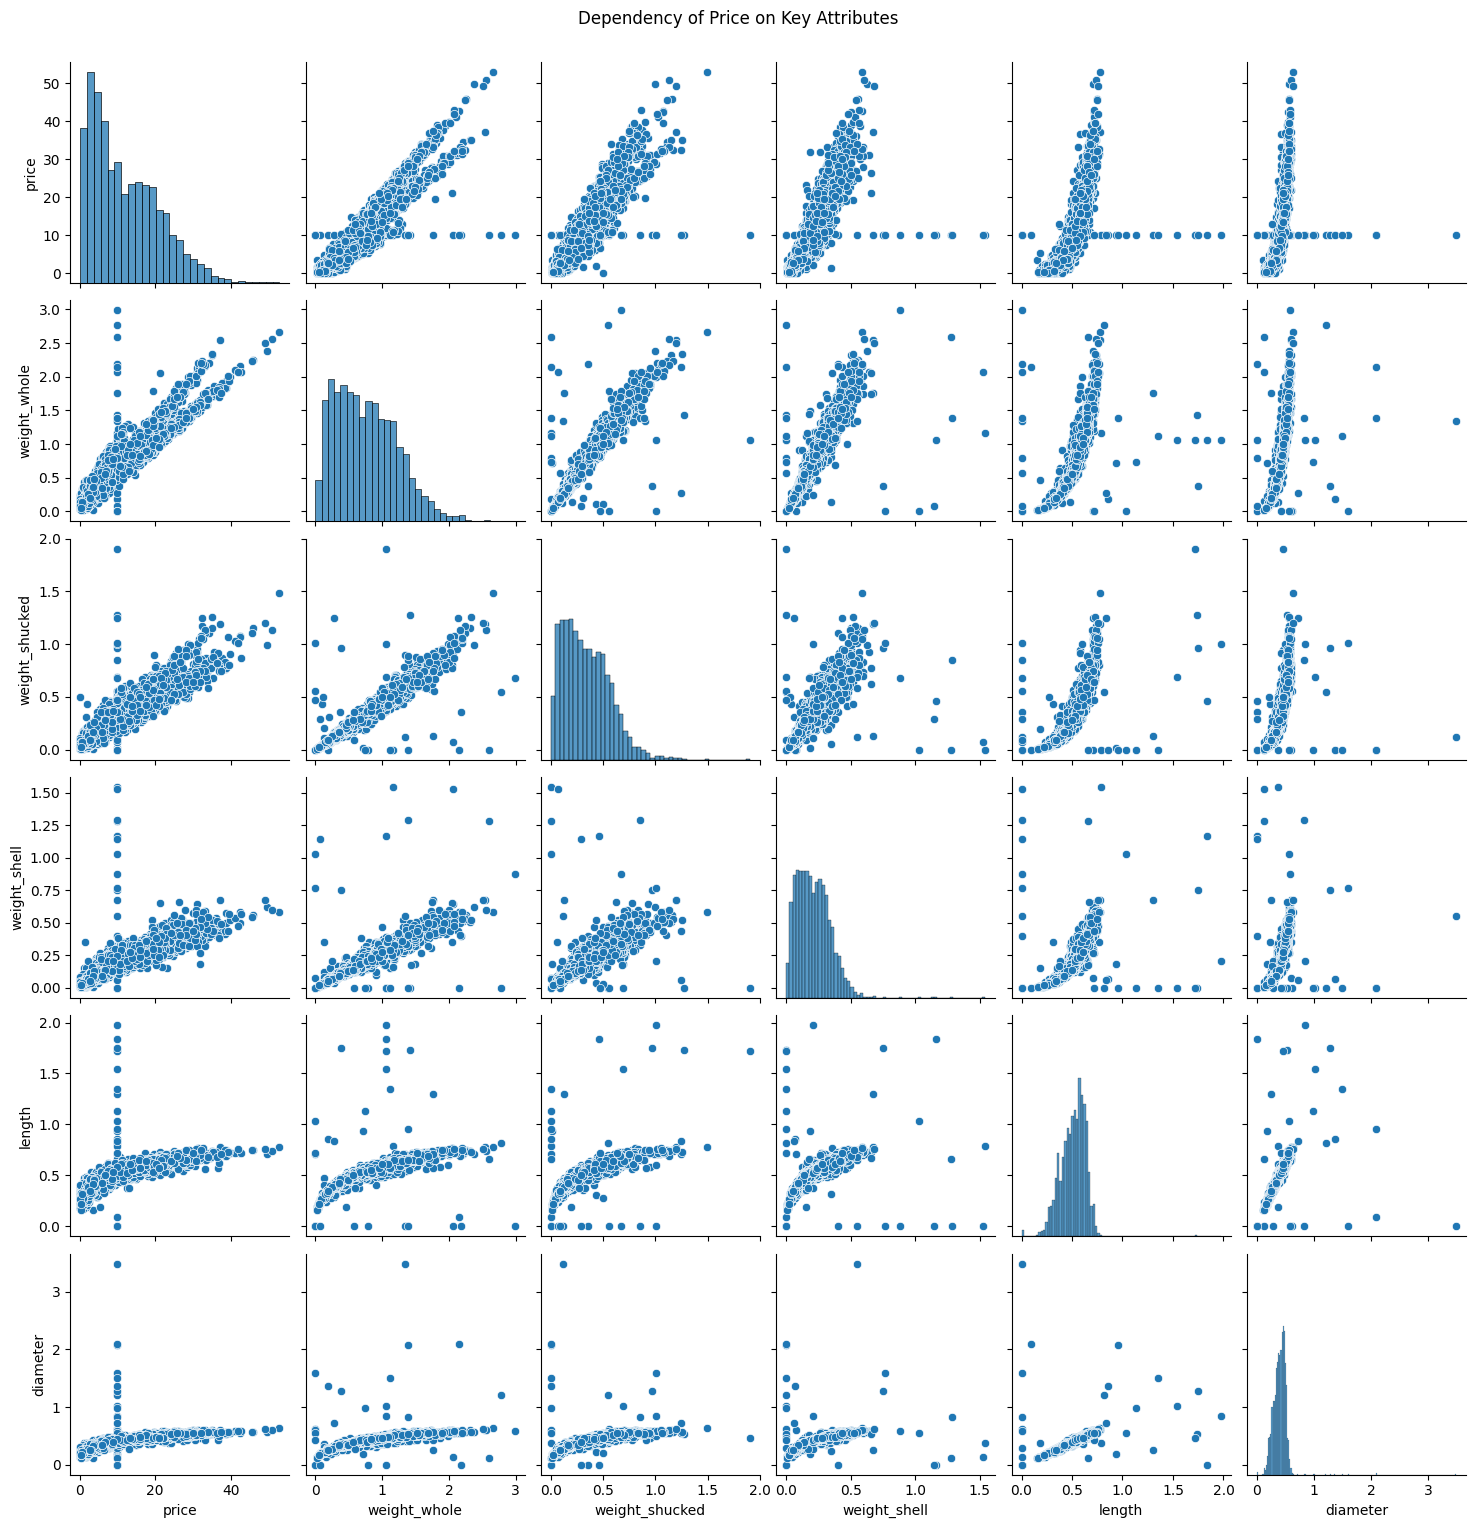

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the most relevant columns based on your previous insights
relevant_columns = ['price', 'weight_whole', 'weight_shucked', 'weight_shell', 'length', 'diameter']

# Create a pair plot
sns.pairplot(df[relevant_columns])
plt.suptitle('Dependency of Price on Key Attributes', y=1.02)  # Adjust title placement
plt.show()

Key takeaways:
* Positive Correlation: All the selected attributes (weight_whole, weight_shucked, weight_shell, length, diameter) show a positive correlation with price. This means as the size or weight of the ear shell increases, the price tends to increase as well.

* Linear Trends: The scatter plots for weight_whole, weight_shucked, and weight_shell versus price show a fairly linear relationship, suggesting that these weights are strong predictors of price.

* Scatter Patterns: For attributes like length and diameter, while the correlation is positive, the scatter plots are a bit more dispersed, indicating variability in how much these dimensions influence price compared to the weight measurements.

* Distribution of Attributes: The histograms on the diagonal show the distribution of each attribute and price. Price, as well as some of the other attributes like weight_shucked and weight_shell, display right-skewed distributions, which suggests that there are outliers with very high values.

* Potential Outliers: Some plots, especially those involving diameter and length, show potential outliers—points that deviate significantly from the main cluster. These outliers might affect the model if not handled properly.

* Diminishing Returns: In some relationships, such as weight_whole versus price, the increase in price tends to very slighthtly flatten as the weight increases, suggesting a little diminishing return on additional weight in terms of price increase.

# Part 2: Modeling

Albert loves ML ! He asks you to use your ML skills to train a model that will predict the **number of rings** based on the other attributes.

Albert was kind enough to pre-assign the dataset samples to train-test with the `subset` attribute. `test` samples should obviously not be used during the training procedure !

In [ ]:
# check for outliers
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()}")


Number of outliers detected: 80


In [ ]:
# data prep
# Separate train and test data based on the 'subset' column
train_data = df[df['subset'] == 'train']
test_data = df[df['subset'] == 'test']

# Separate features and target variable for both training and testing data
X_train = train_data.drop(['rings', 'subset', 'sex'], axis=1)
y_train = train_data['rings']
X_test = test_data.drop(['rings', 'subset', 'sex'], axis=1)
y_test = test_data['rings']


In [ ]:
# model selection and training
# Initialize and train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# model evaluation
# Predicting on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")

# Calculate the Root Mean Squared Error for easier interpretation
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error on Test Data: {rmse}")

Mean Squared Error on Test Data: 1.238497476340694
Root Mean Squared Error on Test Data: 1.1128780150316089


In [ ]:
# model interpretation and visualization

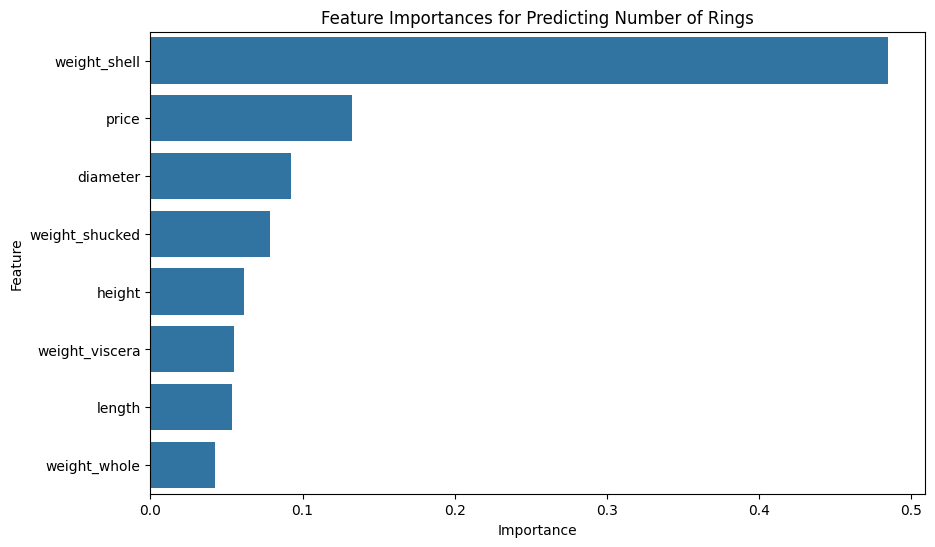

In [ ]:
# Get feature importances
importances = model.feature_importances_
features = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances for Predicting Number of Rings')
plt.show()


# Question 2.1

Which model will you choose to accomplish this task ? Briefly explain why

I chose RandomForestRegressor because it handles non-linear relationships, is robust to outliers, and captures feature interactions effectively, making it well-suited for this regression task.

## Question 2.2

Which metric would you choose to communicate the performance of your model to Albert ? Briefly explain why

I would choose Root Mean Squared Error (RMSE) because it is easy to interpret, representing the average prediction error in the same units as the target variable (number of rings), making it intuitive for understanding the model's performance.

## Question 2.3

How's your model performing ? Please provide the value of your chosen metric on the **test samples** and briefly discuss it

Model Performance:
* Root Mean Squared Error (RMSE) on Test Data: 1.1129

This means that on avg, the model predicts around 1.11 rings from the actual number of rings, meaning the model is reasonably accurate.

# The end !

Thank you for participating in this challenge, we hope you enjoyed it !

Don't forget to submit your work by email and to **include a zip of your work** containing:
- your notebook `challenge.ipynb`
- an export of your notebook as HTML `challenge.html`
- a `requirements.txt` file listing your dependencies
- an image of your visualization for question 1.2

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")


Saving challenge_sol.ipynb to challenge_sol.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip freeze > requirements.txt

In [ ]:
# Generate the requirements.txt file
!pip freeze > requirements.txt

# Display the file explorer to download the file
from google.colab import files
files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>